In [1]:
#Identify different customer profile

#Classification
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [2]:
# Load the dataset into a DataFrame
df = pd.read_csv('SG_Usedcar1.csv')
print(df.head(5))

                                        Brand             Type    Reg_date  \
0            Honda Vezel 1.5A X Honda Sensing              SUV  2015/10/14   
1  Suzuki Swift Sport 1.6M (COE till 12/2022)        Hatchback  2007/12/28   
2                 Porsche 718 Cayman 2.0A PDK       Sports Car   2017/7/19   
3                  Hyundai Elantra 1.6A Elite  Mid-Sized Sedan  2014/11/14   
4             Kia Cerato 1.6A GT Line Sunroof  Mid-Sized Sedan    2019/7/4   

                     Coe_left    Dep  Mileage  Road Tax  Dereg Value    COE  \
0  4yrs 4mths 7days COE left)  10310    50000       682        31237  56001   
1  1yr 6mths 21days COE left)   8210   203000      1030         6656  21349   
2  6yrs 1mth 12days COE left)  34200    21000      1200       106829  50110   
3  3yrs 5mths 7days COE left)  11010    35000       738        31339  64900   
4       8yrs 27days COE left)   9450    21200       738        38416  30009   

   Engine Cap  Curb Weight  Manufactured Transmission   

In [3]:
print(df.shape)

(2500, 19)


In [4]:
import re
# replace all missing value to NAN
df = df.replace('N.A', np.nan)
df = df.replace('N.A.', np.nan)
df = df.replace('NA', np.nan)

df

,Brand,Type,Reg_date,Coe_left,Dep,Mileage,Road Tax,Dereg Value,COE,Engine Cap,Curb Weight,Manufactured,Transmission,OMV,ARF,Power,No. of Owners,Price,Coe_left_days
0,Honda Vezel 1.5A X Honda Sensing,SUV,2015/10/14,4yrs 4mths 7days COE left),10310,50000,682,31237,56001,1496,1190,2015,Auto,19775,9775,96,2,49800,1587
1,Suzuki Swift Sport 1.6M (COE till 12/2022),Hatchback,2007/12/28,1yr 6mths 21days COE left),8210,203000,1030,6656,21349,1586,1060,2007,Manual,12154,13370,92,2,12800,566
2,Porsche 718 Cayman 2.0A PDK,Sports Car,2017/7/19,6yrs 1mth 12days COE left),34200,21000,1200,106829,50110,1988,1365,2017,Auto,71979,101563,220,1,259988,2232
3,Hyundai Elantra 1.6A Elite,Mid-Sized Sedan,2014/11/14,3yrs 5mths 7days COE left),11010,35000,738,31339,64900,1591,1292,2014,Auto,13856,13856,97,1,44800,1252
4,Kia Cerato 1.6A GT Line Sunroof,Mid-Sized Sedan,2019/7/4,8yrs 27days COE left),9450,21200,738,38416,30009,1591,1287,2018,Auto,18894,18894,93,1,85800,2947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,BMW 5 Series 520i,Luxury Sedan,2018/2/22,6yrs 8mths 15days COE left),17990,55000,1210,68148,39000,1998,1530,2017,Auto,45675,55945,135,2,148800,2445
2496,Subaru Forester 2.0X (COE till 12/2024),SUV,2010/4/3,3yrs 6mths 25days COE left),7500,172892,1447,14045,19657,1994,1485,2010,Auto,19090,19090,110,3,26800,1300
2497,Mercedes-Benz C-Class C180,Luxury Sedan,2013/12/20,2yrs 6mths 13days COE left),15240,127000,740,35772,73989,1595,1485,2013,Auto,29525,28335,115,4,52828,923
2498,Mazda 3 1.5A Sunroof,Mid-Sized Sedan,2017/12/7,6yrs 6mths COE left),9340,40200,682,35419,42801,1496,1310,2017,Auto,15108,10108,88,3,65800,2370


In [5]:
# drop the Coe-left column
df = df.drop(['Coe_left'],axis=1)

# Count NaN values in each column
nan_count = df.isna().sum()
print("NaN count in each column:")
print(nan_count)

NaN count in each column:
Brand            0
Type             0
Reg_date         0
Dep              0
Mileage          0
Road Tax         0
Dereg Value      0
COE              0
Engine Cap       0
Curb Weight      0
Manufactured     0
Transmission     0
OMV              0
ARF              0
Power            0
No. of Owners    0
Price            0
Coe_left_days    0
dtype: int64


In [6]:
# Display counts of each type before deletion
type_counts_before = df['Type'].value_counts()
print("Counts before deletion:")
print(type_counts_before)

# Types to be deleted
types_to_delete = ['Van', 'Truck', 'Bus/Mini Bus','Others']

# Deleting rows with specified types
df = df[~df['Type'].isin(types_to_delete)]

# Display counts of each type after deletion
type_counts_after = df['Type'].value_counts()
print("\nCounts after deletion:")
print(type_counts_after)

Counts before deletion:
Type
SUV                561
Luxury Sedan       549
Mid-Sized Sedan    479
Hatchback          320
Sports Car         278
MPV                256
Stationwagon        57
Name: count, dtype: int64

Counts after deletion:
Type
SUV                561
Luxury Sedan       549
Mid-Sized Sedan    479
Hatchback          320
Sports Car         278
MPV                256
Stationwagon        57
Name: count, dtype: int64


In [7]:
# Grouping by 'Type' column and creating separate DataFrames
type_groups = df.groupby('Type')

# Creating separate DataFrames for each type
type_dataframes = {type_val: group for type_val, group in type_groups}

In [8]:
# Accessing the DataFrame for a specific type (e.g., 'Luxury Sedan')
Luxury_Sedan_type_df = type_dataframes['Luxury Sedan']

print("Data for Type 'Luxury Sedan'':")
print(Luxury_Sedan_type_df)

Data for Type 'Luxury Sedan'':
                                              Brand          Type    Reg_date  \
5                                 BMW 3 Series 320i  Luxury Sedan   2012/12/5   
7      Mercedes-Benz E-Class E250 Edition E Sunroof  Luxury Sedan   2016/2/29   
8             Mercedes-Benz C-Class C180 Avantgarde  Luxury Sedan   2015/5/14   
15                          BMW 3 Series 318i Sport  Luxury Sedan    2016/7/7   
16                 Audi A3 Sedan 1.0A TFSI S-tronic  Luxury Sedan   2017/1/20   
...                                             ...           ...         ...   
2484           Nissan Teana 2.5A (COE till 08/2024)  Luxury Sedan    2009/8/7   
2485  Mercedes-Benz E-Class E200 (COE till 07/2028)  Luxury Sedan  2008/10/30   
2494        Mercedes-Benz CLA-Class CLA180 AMG Line  Luxury Sedan   2015/1/30   
2495                              BMW 5 Series 520i  Luxury Sedan   2018/2/22   
2497                     Mercedes-Benz C-Class C180  Luxury Sedan  2013/12/20 

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Convert 'Price' column to numeric (assuming it contains numeric values but stored as strings)
Luxury_Sedan_type_df['Price'] = pd.to_numeric(Luxury_Sedan_type_df['Price'], errors='coerce')

# Drop rows with NaN in 'Price' column
Luxury_Sedan_type_df = Luxury_Sedan_type_df.dropna(subset=['Price'])

# Binning the 'Price' column into two groups
threshold = Luxury_Sedan_type_df['Price'].median()

Luxury_Sedan_type_df['Price_Group'] = pd.cut(Luxury_Sedan_type_df['Price'],
                                             bins=[Luxury_Sedan_type_df['Price'].min(), threshold, Luxury_Sedan_type_df['Price'].max()],
                                             labels=['Low', 'High'],
                                             include_lowest=True)

# Define features and target variable
X = Luxury_Sedan_type_df.drop(['Price', 'No. of Owners', 'Reg_date', 'Brand', 'Type', 'ARF', 'Price_Group','Transmission','COE'], axis=1)
y = Luxury_Sedan_type_df['Price_Group']  # Target variable ('Price_Group')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3,random_state=42)

# Train the classifier using the training data
clf.fit(X_train, y_train)

# Predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9363636363636364


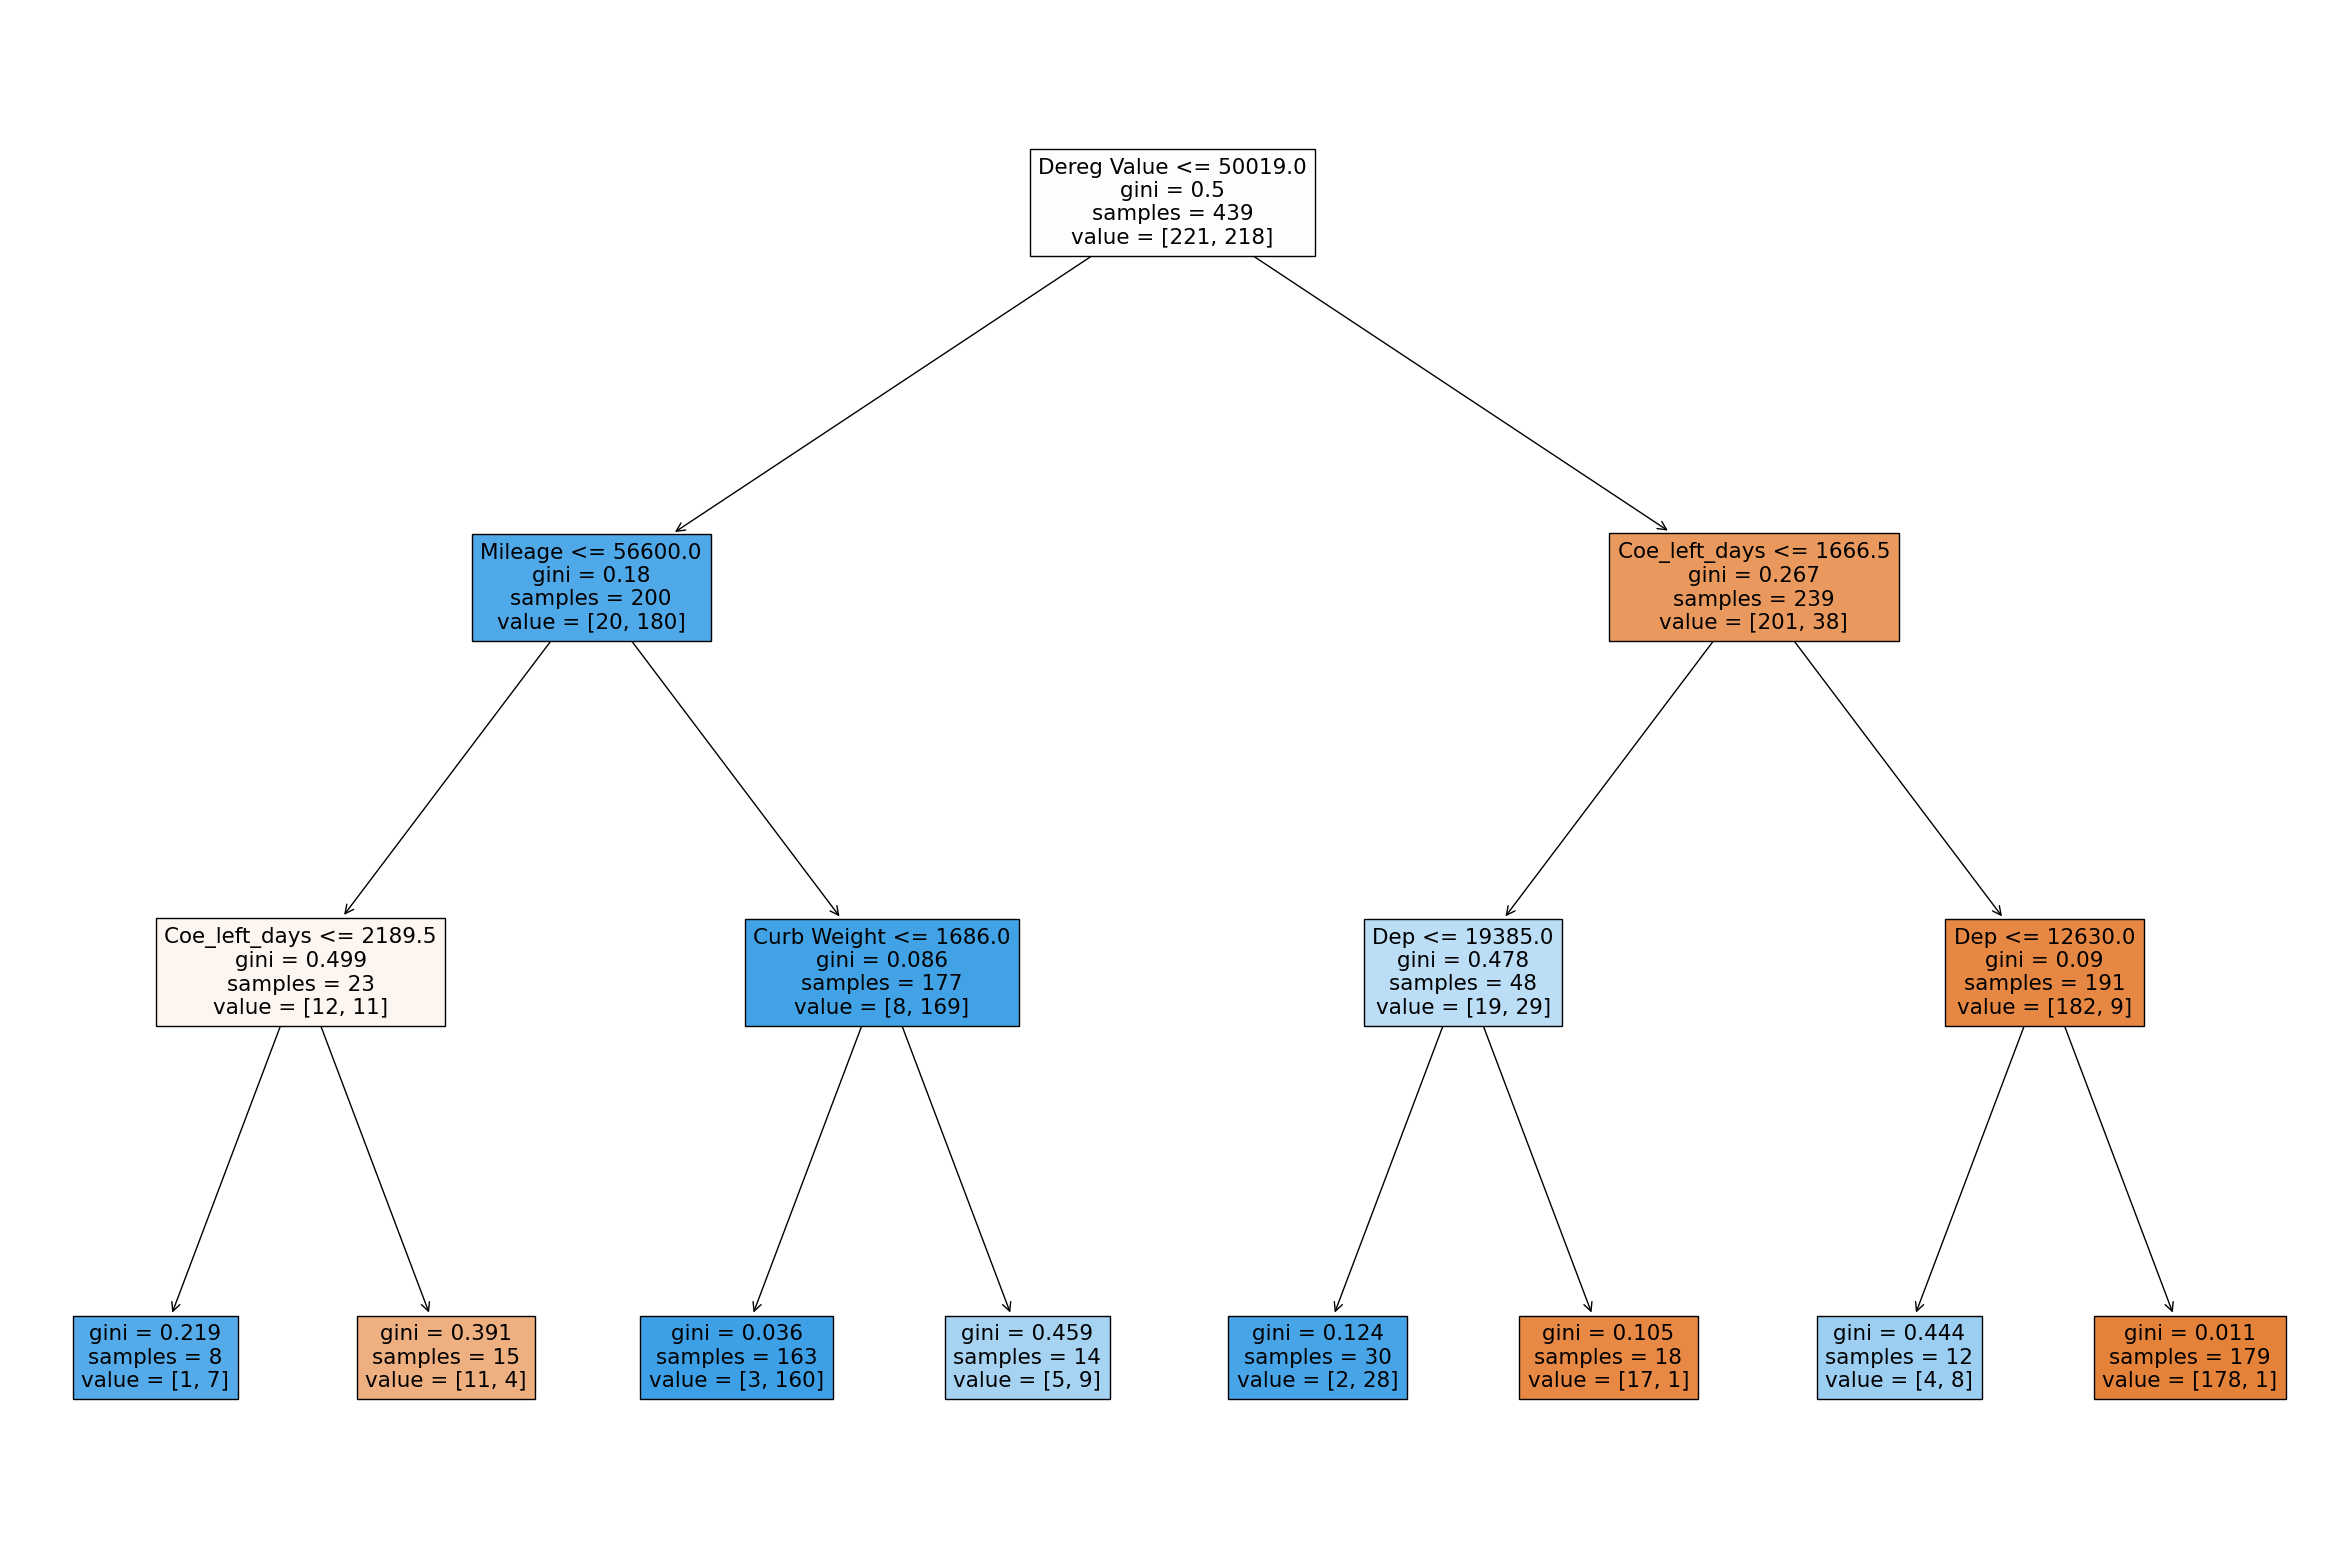

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Fit the Decision Tree Classifier
clf.fit(X_train, y_train)

plt.figure(figsize=(30,20))
plot_tree(clf, filled=True, feature_names=['Dep','Mileage','Road Tax','Dereg Value','Engine Cap','Curb Weight','Manufactured','OMV','Power','Coe_left_days'])
plt.show()

         Feature  Importance
3    Dereg Value    0.640765
9  Coe_left_days    0.148265
0            Dep    0.145575
1        Mileage    0.049541
5    Curb Weight    0.015855
2       Road Tax    0.000000
4     Engine Cap    0.000000
6   Manufactured    0.000000
7            OMV    0.000000
8          Power    0.000000


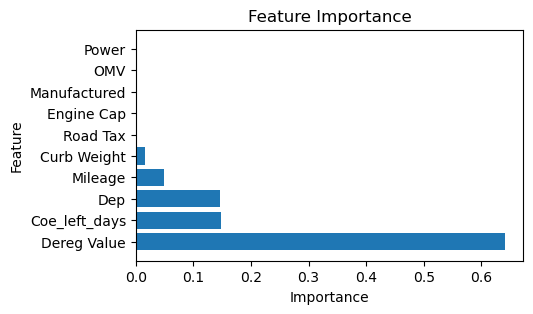

In [11]:
# Get feature importances
feature_importance = clf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': ['Dep','Mileage','Road Tax','Dereg Value','Engine Cap','Curb Weight','Manufactured','OMV','Power','Coe_left_days'], 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display or plot feature importances
print(feature_importance_df)
# Or visualize as a bar plot
plt.figure(figsize=(5, 3))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [12]:
print(X_test.iloc[[3]])

       Dep  Mileage  Road Tax  Dereg Value  Engine Cap  Curb Weight  \
529  16820    75000      1210        69707        1998         1540   

     Manufactured    OMV  Power  Coe_left_days  
529          2017  42318    135           2376  


In [13]:
SUV_df = type_dataframes['SUV']

# Convert 'Price' column to numeric (assuming it contains numeric values but stored as strings)
SUV_df['Price'] = pd.to_numeric(SUV_df['Price'], errors='coerce')

# Drop rows with NaN in 'Price' column
SUV_df = SUV_df.dropna(subset=['Price'])

# Binning the 'Price' column into two groups
threshold = SUV_df['Price'].median()

SUV_df['Price_Group'] = pd.cut(SUV_df['Price'],
                                             bins=[SUV_df['Price'].min(), threshold, SUV_df['Price'].max()],
                                             labels=['Low', 'High'],
                                             include_lowest=True)

# Define features and target variable
X_s = SUV_df.drop(['Price', 'No. of Owners', 'Reg_date', 'Brand', 'Type', 'ARF', 'Price_Group','Transmission','COE'], axis=1)
y_s = SUV_df['Price_Group']  # Target variable ('Price_Group')

# Split the data into training and testing sets
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf_s = DecisionTreeClassifier(max_depth=3,random_state=42)

# Train the classifier using the training data
clf_s.fit(X_train_s, y_train_s)

# Predictions on the testing set
y_pred_s = clf_s.predict(X_test_s)

# Evaluate the model
accuracy_s = accuracy_score(y_test_s, y_pred_s)
print(f"Accuracy_s: {accuracy_s}")

Accuracy_s: 0.9557522123893806


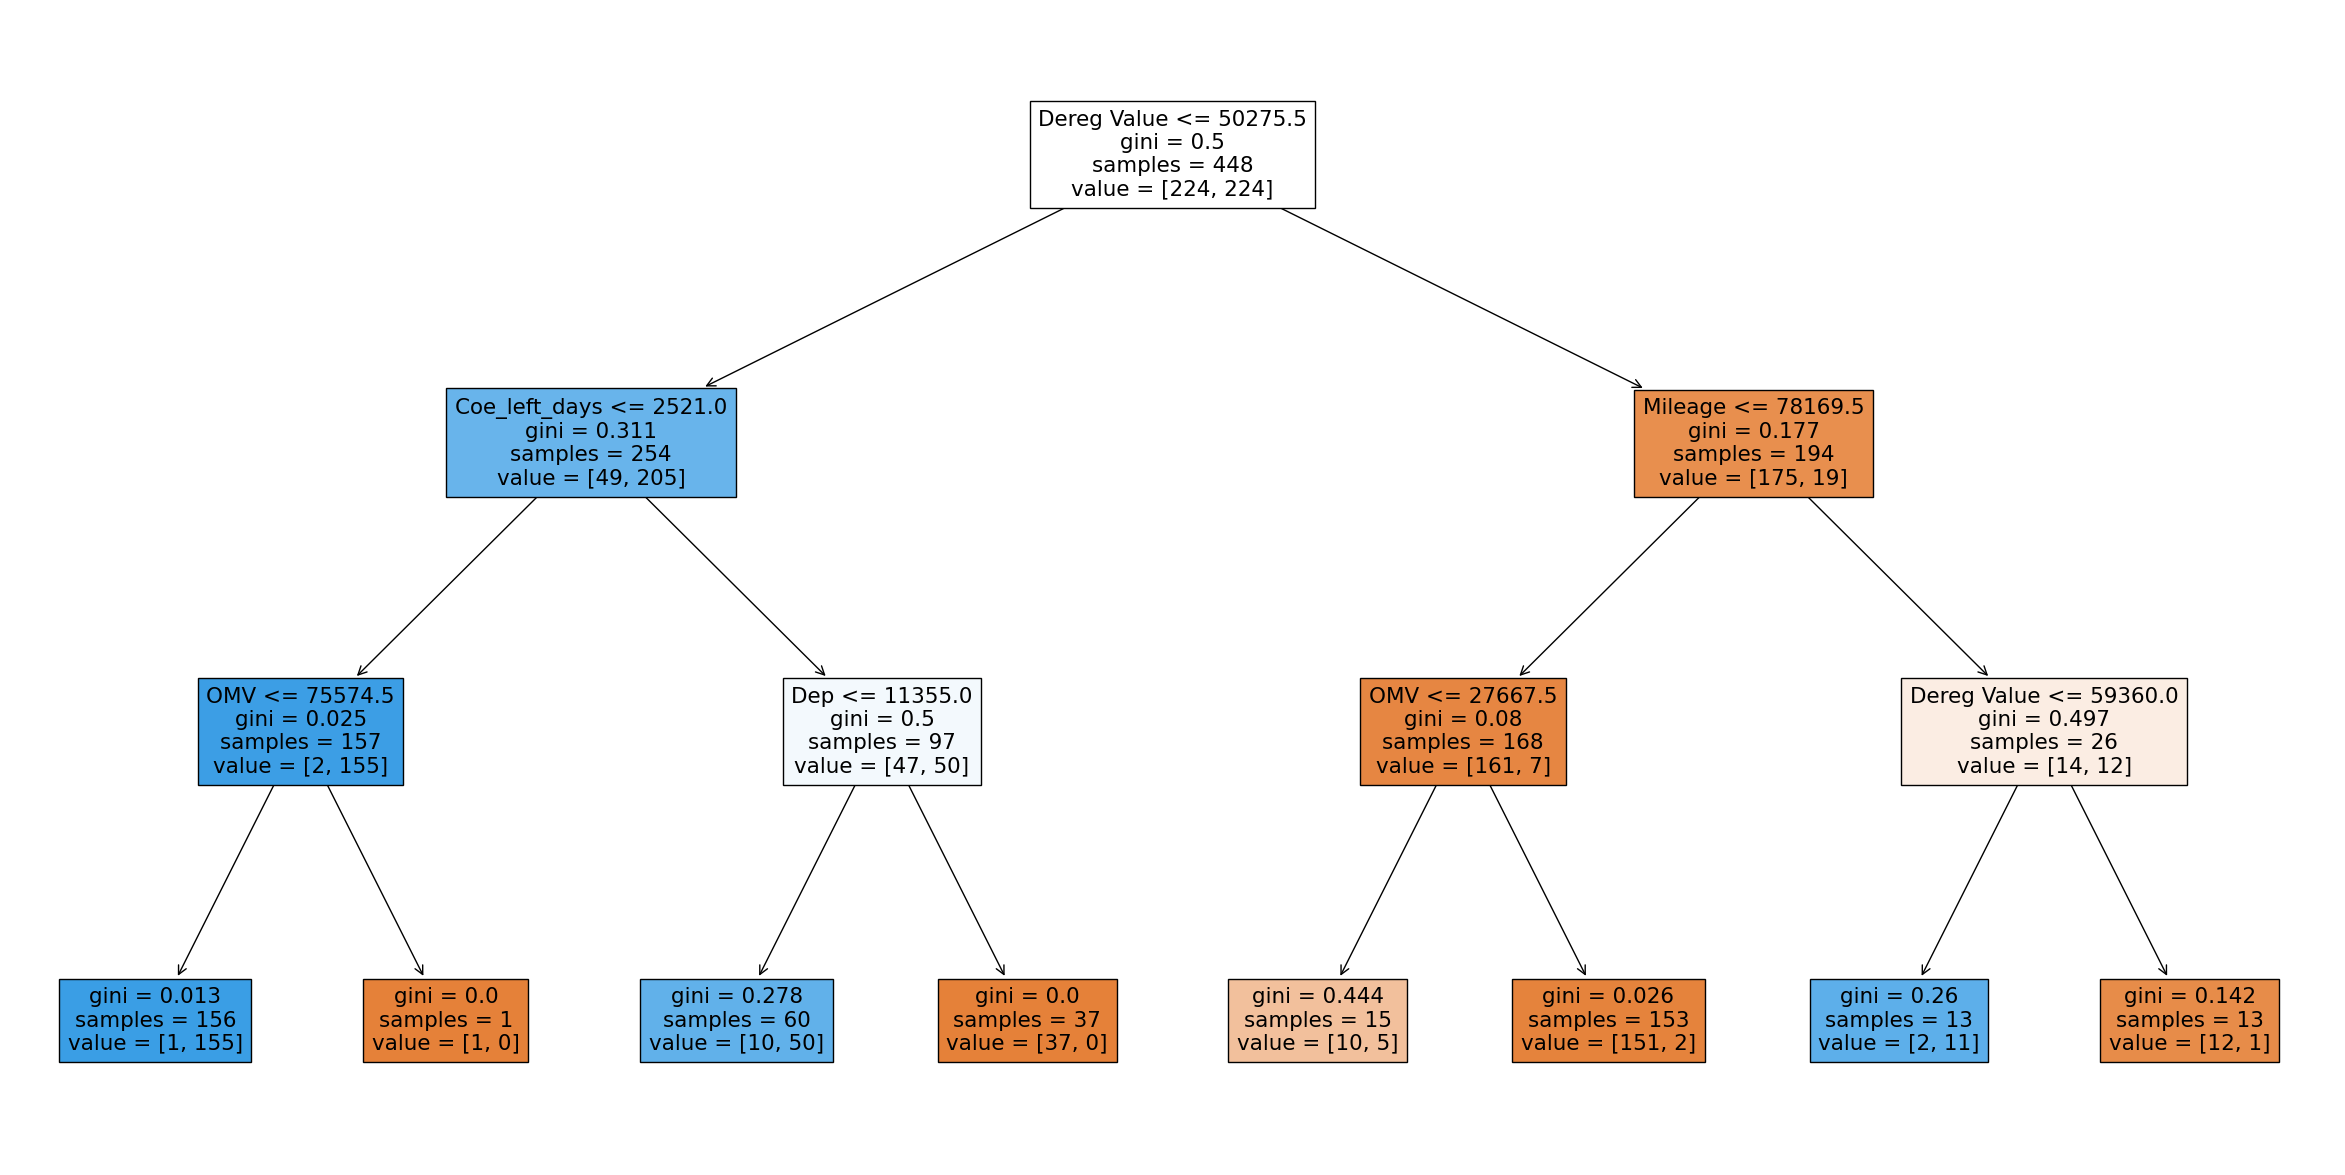

         Feature  Importance
3    Dereg Value    0.624374
0            Dep    0.167740
9  Coe_left_days    0.140853
1        Mileage    0.041892
7            OMV    0.025141
2       Road Tax    0.000000
4     Engine Cap    0.000000
5    Curb Weight    0.000000
6   Manufactured    0.000000
8          Power    0.000000


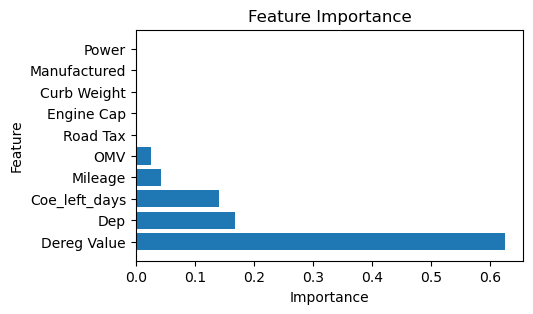

In [14]:
# Fit the Decision Tree Classifier
clf_s.fit(X_train_s, y_train_s)

plt.figure(figsize=(30,15))
plot_tree(clf_s, filled=True, feature_names=['Dep','Mileage','Road Tax','Dereg Value','Engine Cap','Curb Weight','Manufactured','OMV','Power','Coe_left_days'])
plt.show()

# Get feature importances
feature_importance_s = clf_s.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_s_df = pd.DataFrame({'Feature': ['Dep','Mileage','Road Tax','Dereg Value','Engine Cap','Curb Weight','Manufactured','OMV','Power','Coe_left_days'], 'Importance': feature_importance_s})
feature_importance_s_df = feature_importance_s_df.sort_values(by='Importance', ascending=False)

# Display or plot feature importances
print(feature_importance_s_df)
# Or visualize as a bar plot
plt.figure(figsize=(5, 3))
plt.barh(feature_importance_s_df['Feature'], feature_importance_s_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

Accuracy_m: 0.875


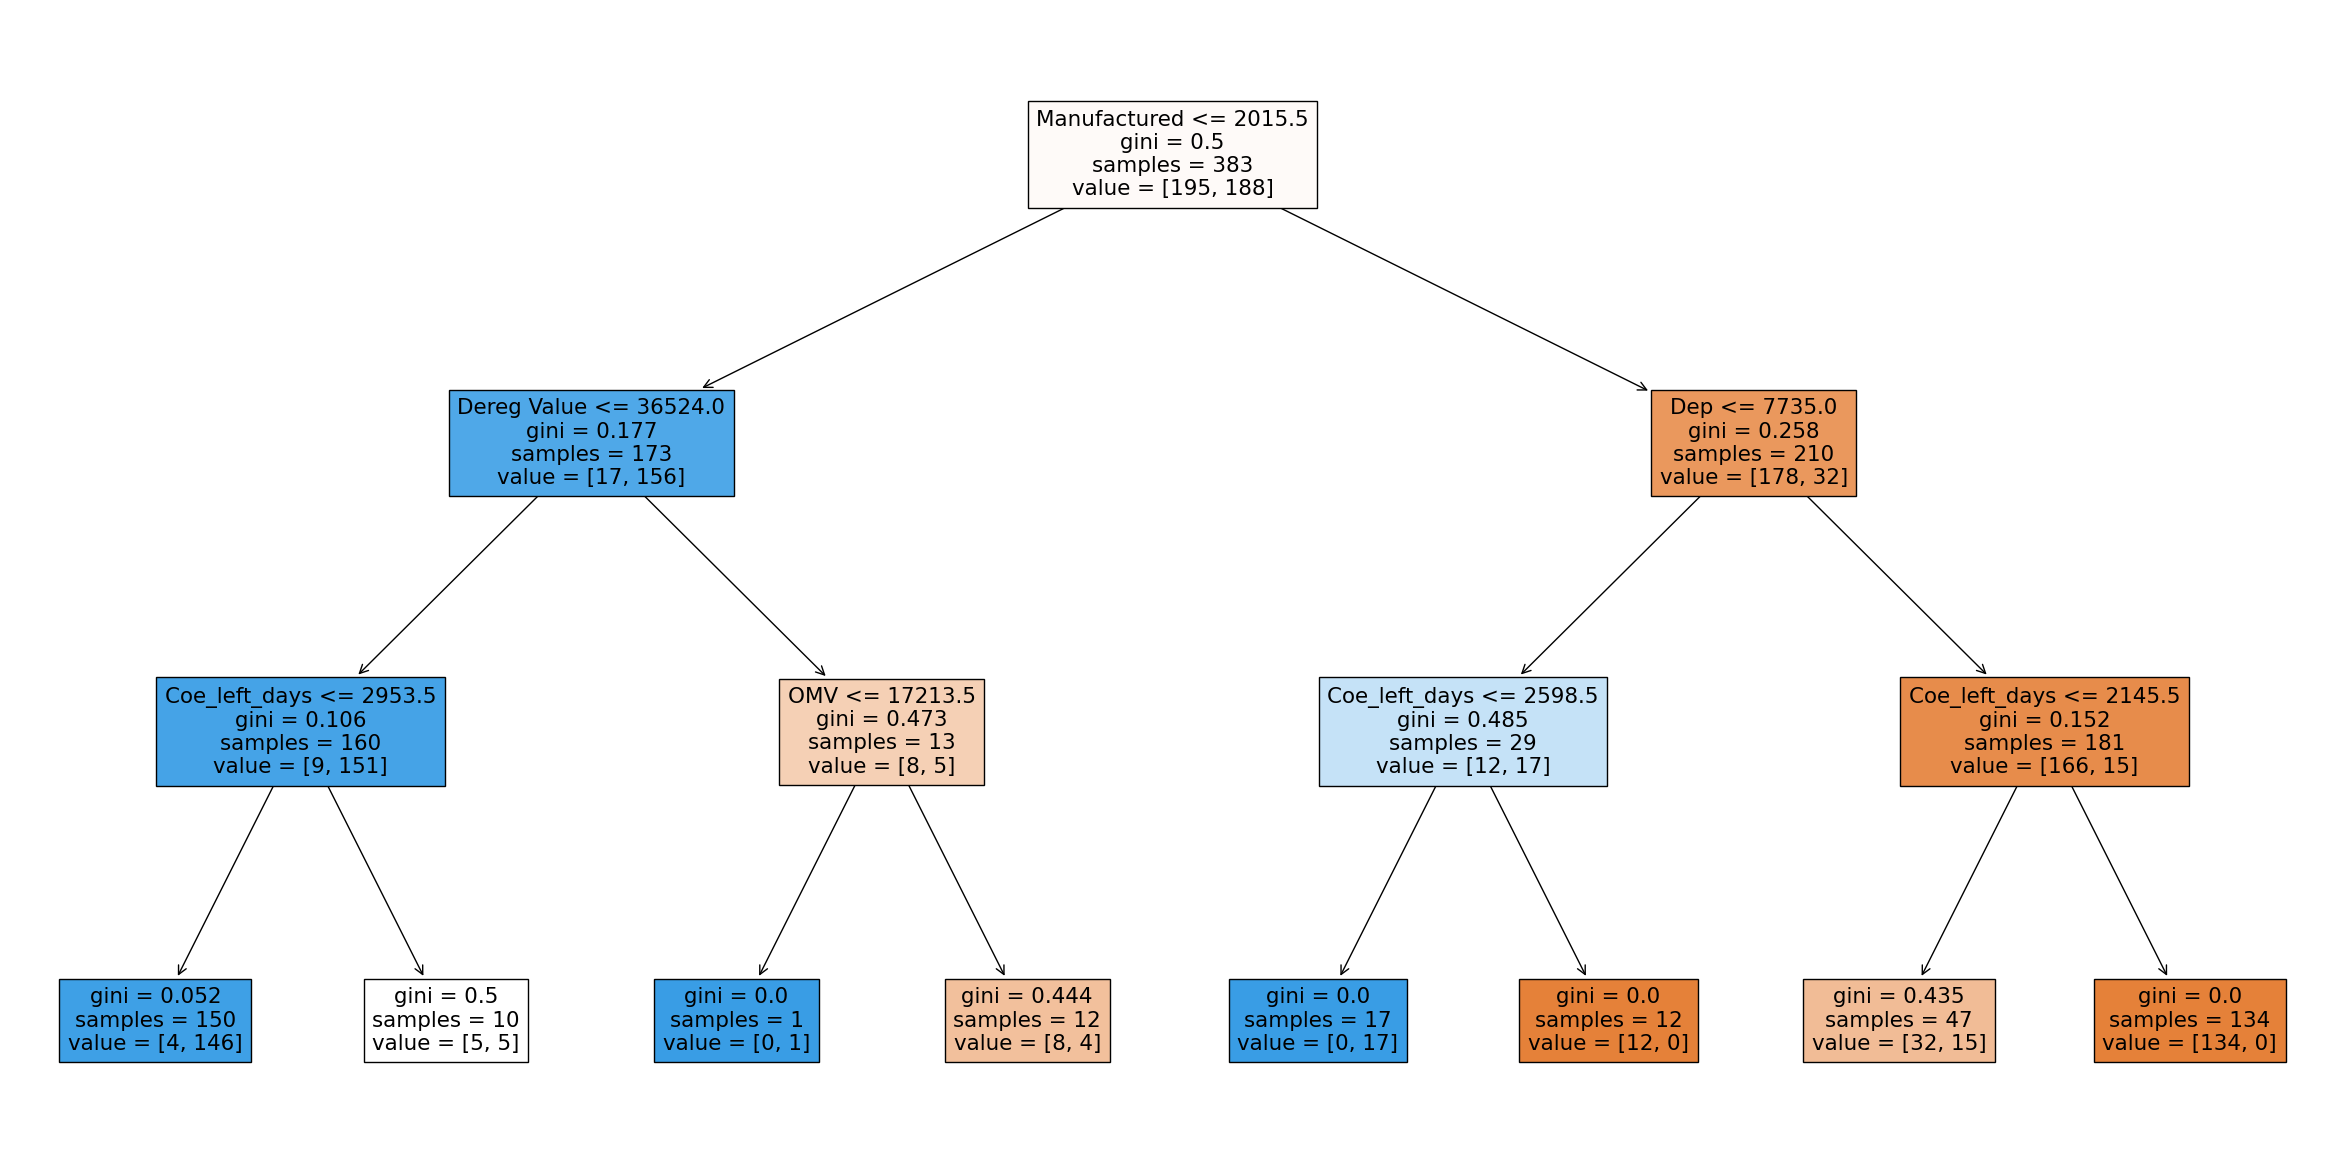

         Feature  Importance
6   Manufactured    0.696770
9  Coe_left_days    0.165858
0            Dep    0.082836
3    Dereg Value    0.049170
7            OMV    0.005367
1        Mileage    0.000000
2       Road Tax    0.000000
4     Engine Cap    0.000000
5    Curb Weight    0.000000
8          Power    0.000000


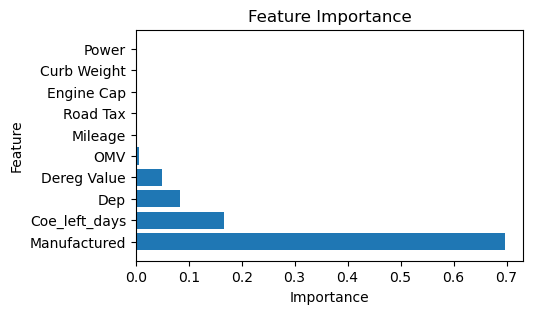

In [15]:
Mid_Sized_Sedan_df = type_dataframes['Mid-Sized Sedan']

# Convert 'Price' column to numeric (assuming it contains numeric values but stored as strings)
Mid_Sized_Sedan_df['Price'] = pd.to_numeric(Mid_Sized_Sedan_df['Price'], errors='coerce')

# Drop rows with NaN in 'Price' column
Mid_Sized_Sedan_df = Mid_Sized_Sedan_df.dropna(subset=['Price'])

# Binning the 'Price' column into two groups
threshold = Mid_Sized_Sedan_df['Price'].median()

Mid_Sized_Sedan_df['Price_Group'] = pd.cut(Mid_Sized_Sedan_df['Price'],
                                             bins=[Mid_Sized_Sedan_df['Price'].min(), threshold, Mid_Sized_Sedan_df['Price'].max()],
                                             labels=['Low', 'High'],
                                             include_lowest=True)

# Define features and target variable
X_m = Mid_Sized_Sedan_df.drop(['Price', 'No. of Owners', 'Reg_date', 'Brand', 'Type', 'ARF', 'Price_Group','Transmission','COE'], axis=1)
y_m = Mid_Sized_Sedan_df['Price_Group']  # Target variable ('Price_Group')

# Split the data into training and testing sets
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf_m = DecisionTreeClassifier(max_depth=3,random_state=42)

# Train the classifier using the training data
clf_m.fit(X_train_m, y_train_m)

# Predictions on the testing set
y_pred_m = clf_m.predict(X_test_m)

# Evaluate the model
accuracy_m = accuracy_score(y_test_m, y_pred_m)
print(f"Accuracy_m: {accuracy_m}")

# Fit the Decision Tree Classifier
clf_m.fit(X_train_m, y_train_m)

%matplotlib inline
plt.figure(figsize=(30,15))
plot_tree(clf_m, filled=True, feature_names=['Dep','Mileage','Road Tax','Dereg Value','Engine Cap','Curb Weight','Manufactured','OMV','Power','Coe_left_days'])
plt.show()

# Get feature importances
feature_importance_m = clf_m.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_m_df = pd.DataFrame({'Feature': ['Dep','Mileage','Road Tax','Dereg Value','Engine Cap','Curb Weight','Manufactured','OMV','Power','Coe_left_days'], 'Importance': feature_importance_m})
feature_importance_m_df = feature_importance_m_df.sort_values(by='Importance', ascending=False)

# Display or plot feature importances
print(feature_importance_m_df)
# Or visualize as a bar plot
plt.figure(figsize=(5, 3))
plt.barh(feature_importance_m_df['Feature'], feature_importance_m_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

Accuracy_h: 0.859375


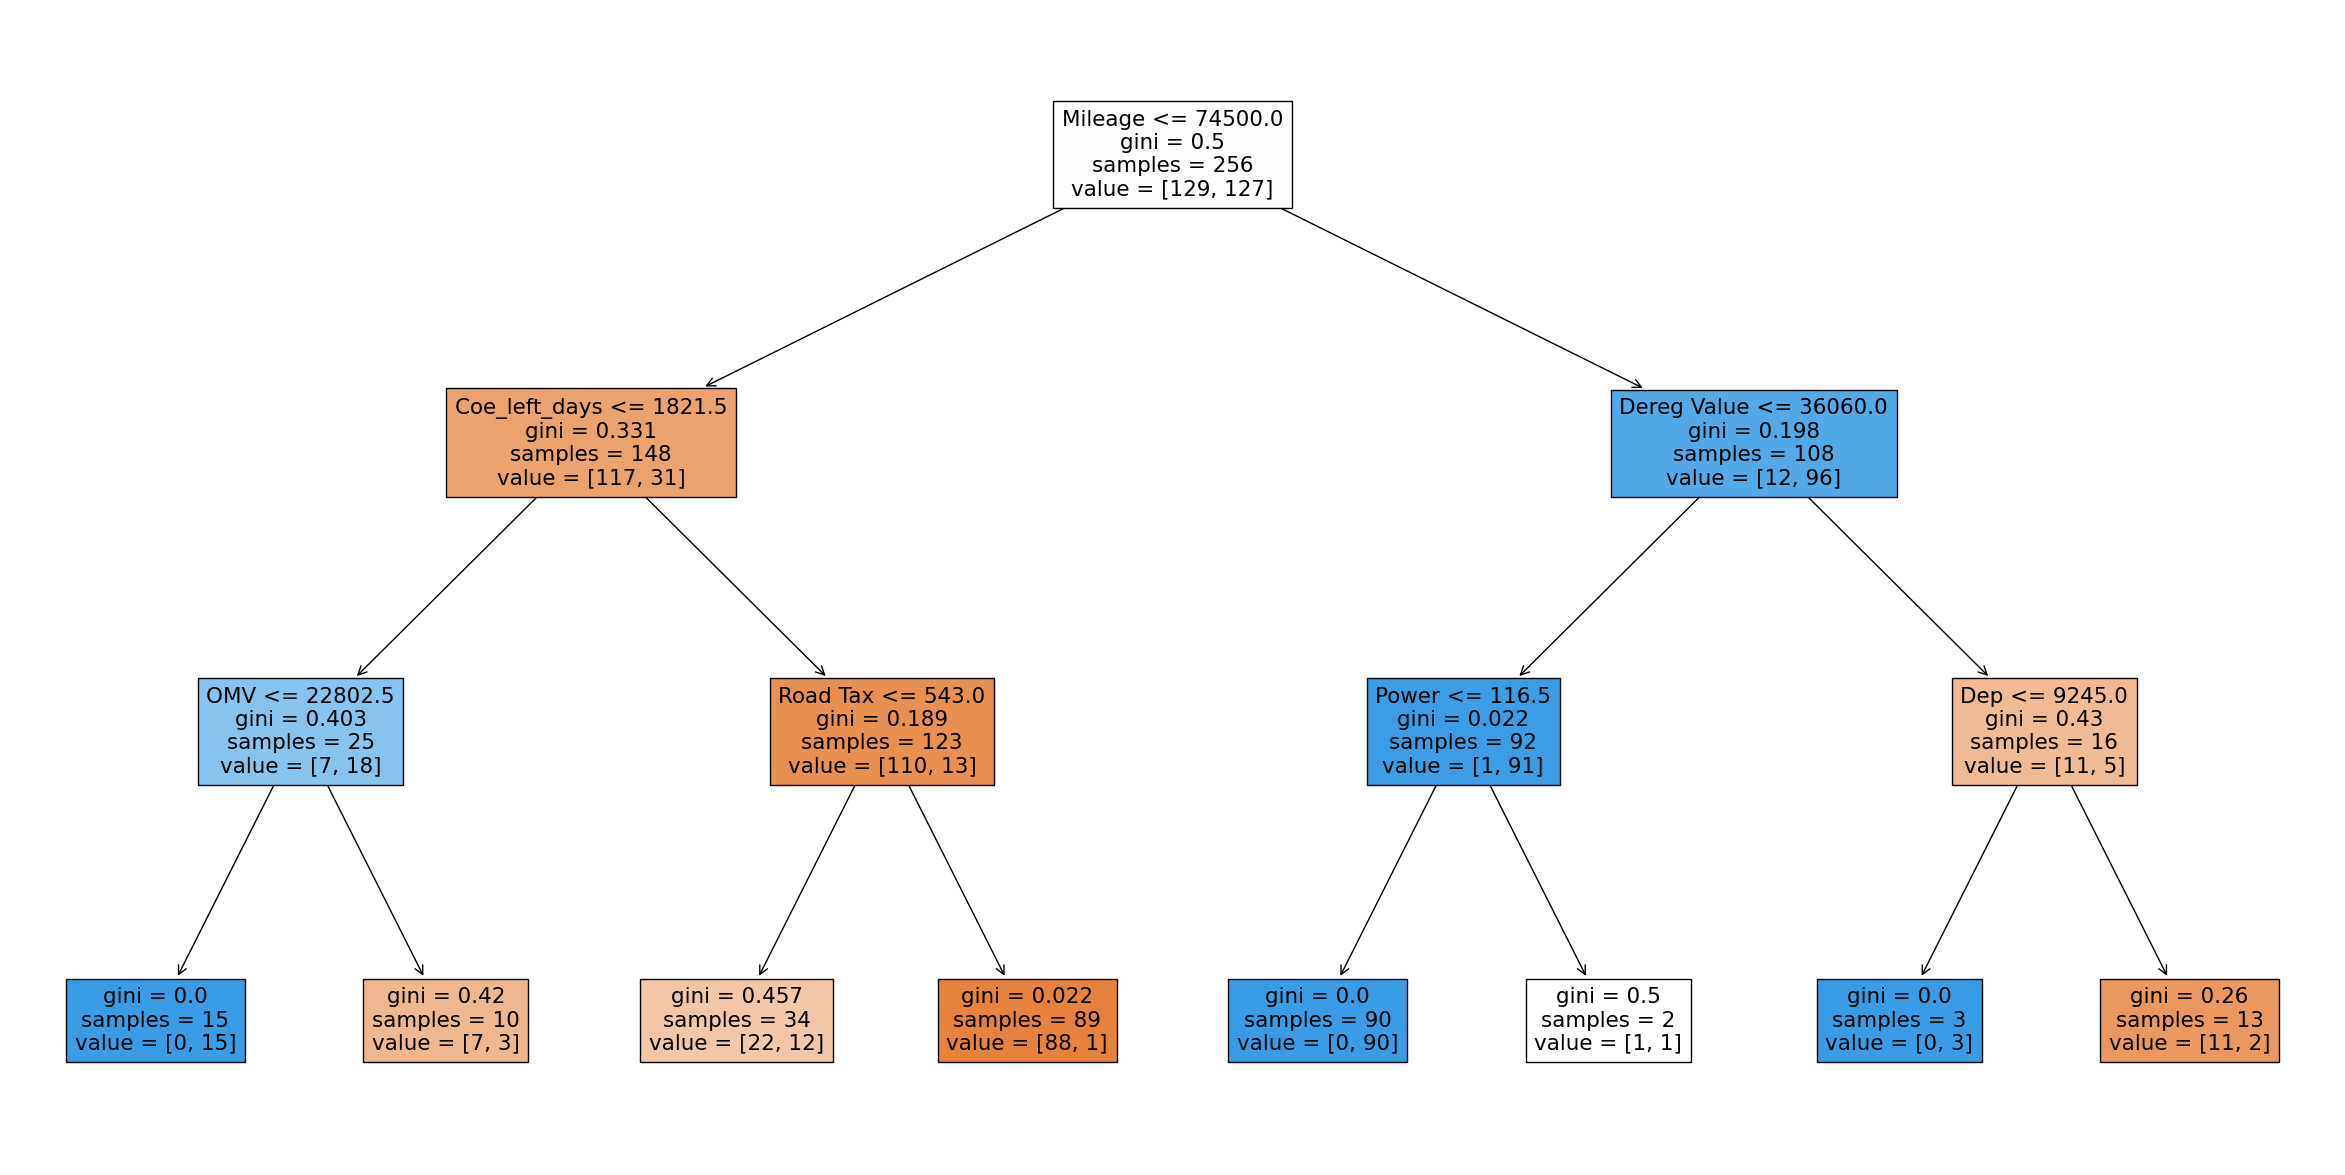

         Feature  Importance
1        Mileage    0.565702
9  Coe_left_days    0.153890
3    Dereg Value    0.122473
7            OMV    0.057703
2       Road Tax    0.056379
0            Dep    0.034253
8          Power    0.009600
4     Engine Cap    0.000000
5    Curb Weight    0.000000
6   Manufactured    0.000000


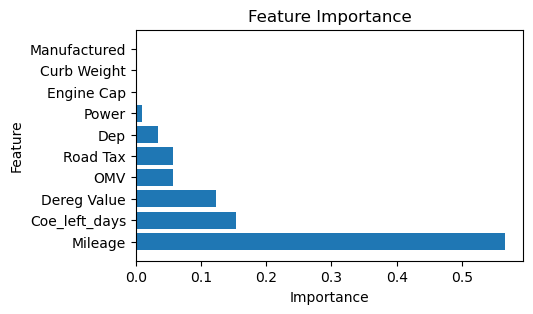

In [16]:
Hatchback_df = type_dataframes['Hatchback']

# Convert 'Price' column to numeric (assuming it contains numeric values but stored as strings)
Hatchback_df['Price'] = pd.to_numeric(Hatchback_df['Price'], errors='coerce')

# Drop rows with NaN in 'Price' column
Hatchback_df = Hatchback_df.dropna(subset=['Price'])

# Binning the 'Price' column into two groups
threshold = Hatchback_df['Price'].median()

Hatchback_df['Price_Group'] = pd.cut(Hatchback_df['Price'],
                                             bins=[Hatchback_df['Price'].min(), threshold, Hatchback_df['Price'].max()],
                                             labels=['Low', 'High'],
                                             include_lowest=True)

# Define features and target variable
X_h = Hatchback_df.drop(['Price', 'No. of Owners', 'Reg_date', 'Brand', 'Type','ARF', 'Price_Group','Transmission','COE'], axis=1)
y_h = Hatchback_df['Price_Group']  # Target variable ('Price_Group')

# Split the data into training and testing sets
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_h, y_h, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf_h = DecisionTreeClassifier(max_depth=3,random_state=42)

# Train the classifier using the training data
clf_h.fit(X_train_h, y_train_h)

# Predictions on the testing set
y_pred_h = clf_h.predict(X_test_h)

# Evaluate the model
accuracy_h = accuracy_score(y_test_h, y_pred_h)
print(f"Accuracy_h: {accuracy_h}")

# Fit the Decision Tree Classifier
clf_h.fit(X_train_h, y_train_h)

%matplotlib inline
plt.figure(figsize=(30,15))
plot_tree(clf_h, filled=True, feature_names=['Dep','Mileage','Road Tax','Dereg Value','Engine Cap','Curb Weight','Manufactured','OMV','Power','Coe_left_days'])
plt.show()

# Get feature importances
feature_importance_h = clf_h.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_h_df = pd.DataFrame({'Feature': ['Dep','Mileage','Road Tax','Dereg Value','Engine Cap','Curb Weight','Manufactured','OMV','Power','Coe_left_days'], 'Importance': feature_importance_h})
feature_importance_h_df = feature_importance_h_df.sort_values(by='Importance', ascending=False)

# Display or plot feature importances
print(feature_importance_h_df)
# Or visualize as a bar plot
plt.figure(figsize=(5, 3))
plt.barh(feature_importance_h_df['Feature'], feature_importance_h_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

Accuracy_sc: 0.9642857142857143


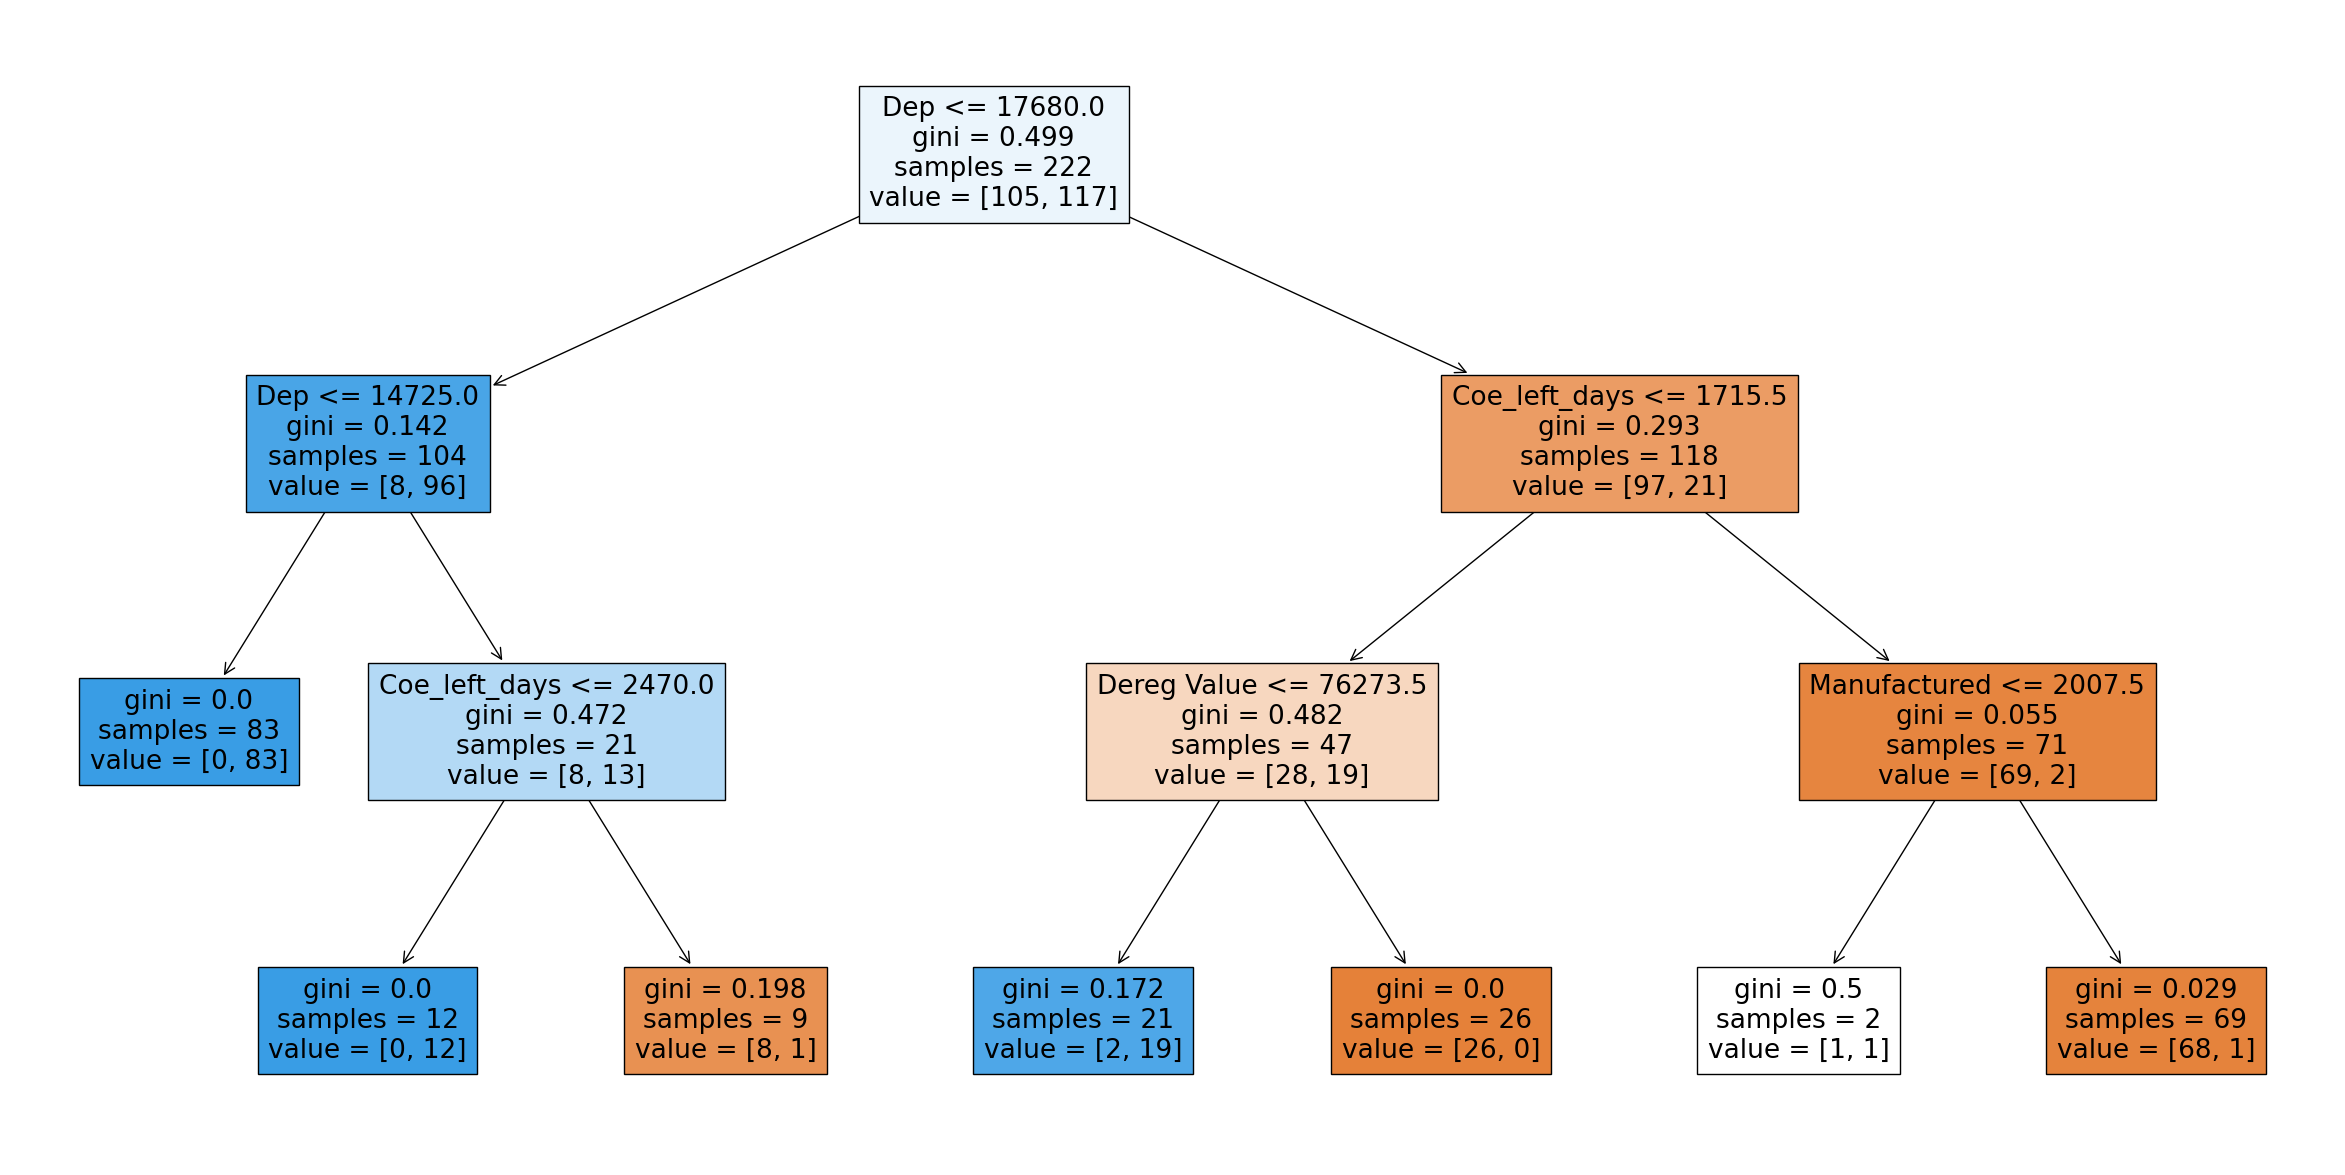

         Feature  Importance
0            Dep    0.647511
3    Dereg Value    0.185902
9  Coe_left_days    0.157630
6   Manufactured    0.008956
1        Mileage    0.000000
2       Road Tax    0.000000
4     Engine Cap    0.000000
5    Curb Weight    0.000000
7            OMV    0.000000
8          Power    0.000000


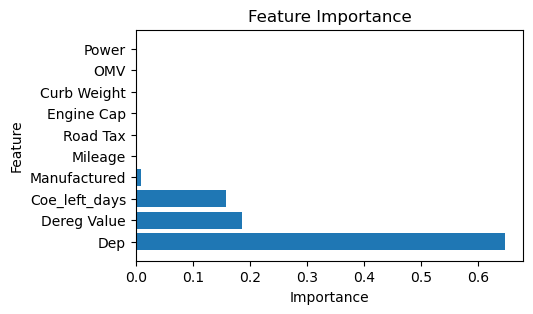

In [17]:
SportsCar_df = type_dataframes['Sports Car']

# Convert 'Price' column to numeric (assuming it contains numeric values but stored as strings)
SportsCar_df['Price'] = pd.to_numeric(SportsCar_df['Price'], errors='coerce')

# Drop rows with NaN in 'Price' column
SportsCar_df = SportsCar_df.dropna(subset=['Price'])

# Binning the 'Price' column into two groups
threshold = SportsCar_df['Price'].median()

SportsCar_df['Price_Group'] = pd.cut(SportsCar_df['Price'],
                                             bins=[SportsCar_df['Price'].min(), threshold, SportsCar_df['Price'].max()],
                                             labels=['Low', 'High'],
                                             include_lowest=True)

# Define features and target variable
X_sc = SportsCar_df.drop(['Price', 'No. of Owners', 'Reg_date', 'Brand', 'Type', 'ARF', 'Price_Group','Transmission','COE'], axis=1)
y_sc = SportsCar_df['Price_Group']  # Target variable ('Price_Group')

# Split the data into training and testing sets
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_sc, y_sc, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf_sc = DecisionTreeClassifier(max_depth=3,random_state=42)

# Train the classifier using the training data
clf_sc.fit(X_train_sc, y_train_sc)

# Predictions on the testing set
y_pred_sc = clf_sc.predict(X_test_sc)

# Evaluate the model
accuracy_sc = accuracy_score(y_test_sc, y_pred_sc)
print(f"Accuracy_sc: {accuracy_sc}")

# Fit the Decision Tree Classifier
clf_sc.fit(X_train_sc, y_train_sc)

%matplotlib inline
plt.figure(figsize=(30,15))
plot_tree(clf_sc, filled=True, feature_names=['Dep','Mileage','Road Tax','Dereg Value','Engine Cap','Curb Weight','Manufactured','OMV','Power','Coe_left_days'])
plt.show()

# Get feature importances
feature_importance_sc = clf_sc.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_sc_df = pd.DataFrame({'Feature': ['Dep','Mileage','Road Tax','Dereg Value','Engine Cap','Curb Weight','Manufactured','OMV','Power','Coe_left_days'], 'Importance': feature_importance_sc})
feature_importance_sc_df = feature_importance_sc_df.sort_values(by='Importance', ascending=False)

# Display or plot feature importances
print(feature_importance_sc_df)
# Or visualize as a bar plot
plt.figure(figsize=(5, 3))
plt.barh(feature_importance_sc_df['Feature'], feature_importance_sc_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

Accuracy_MPV: 0.8846153846153846


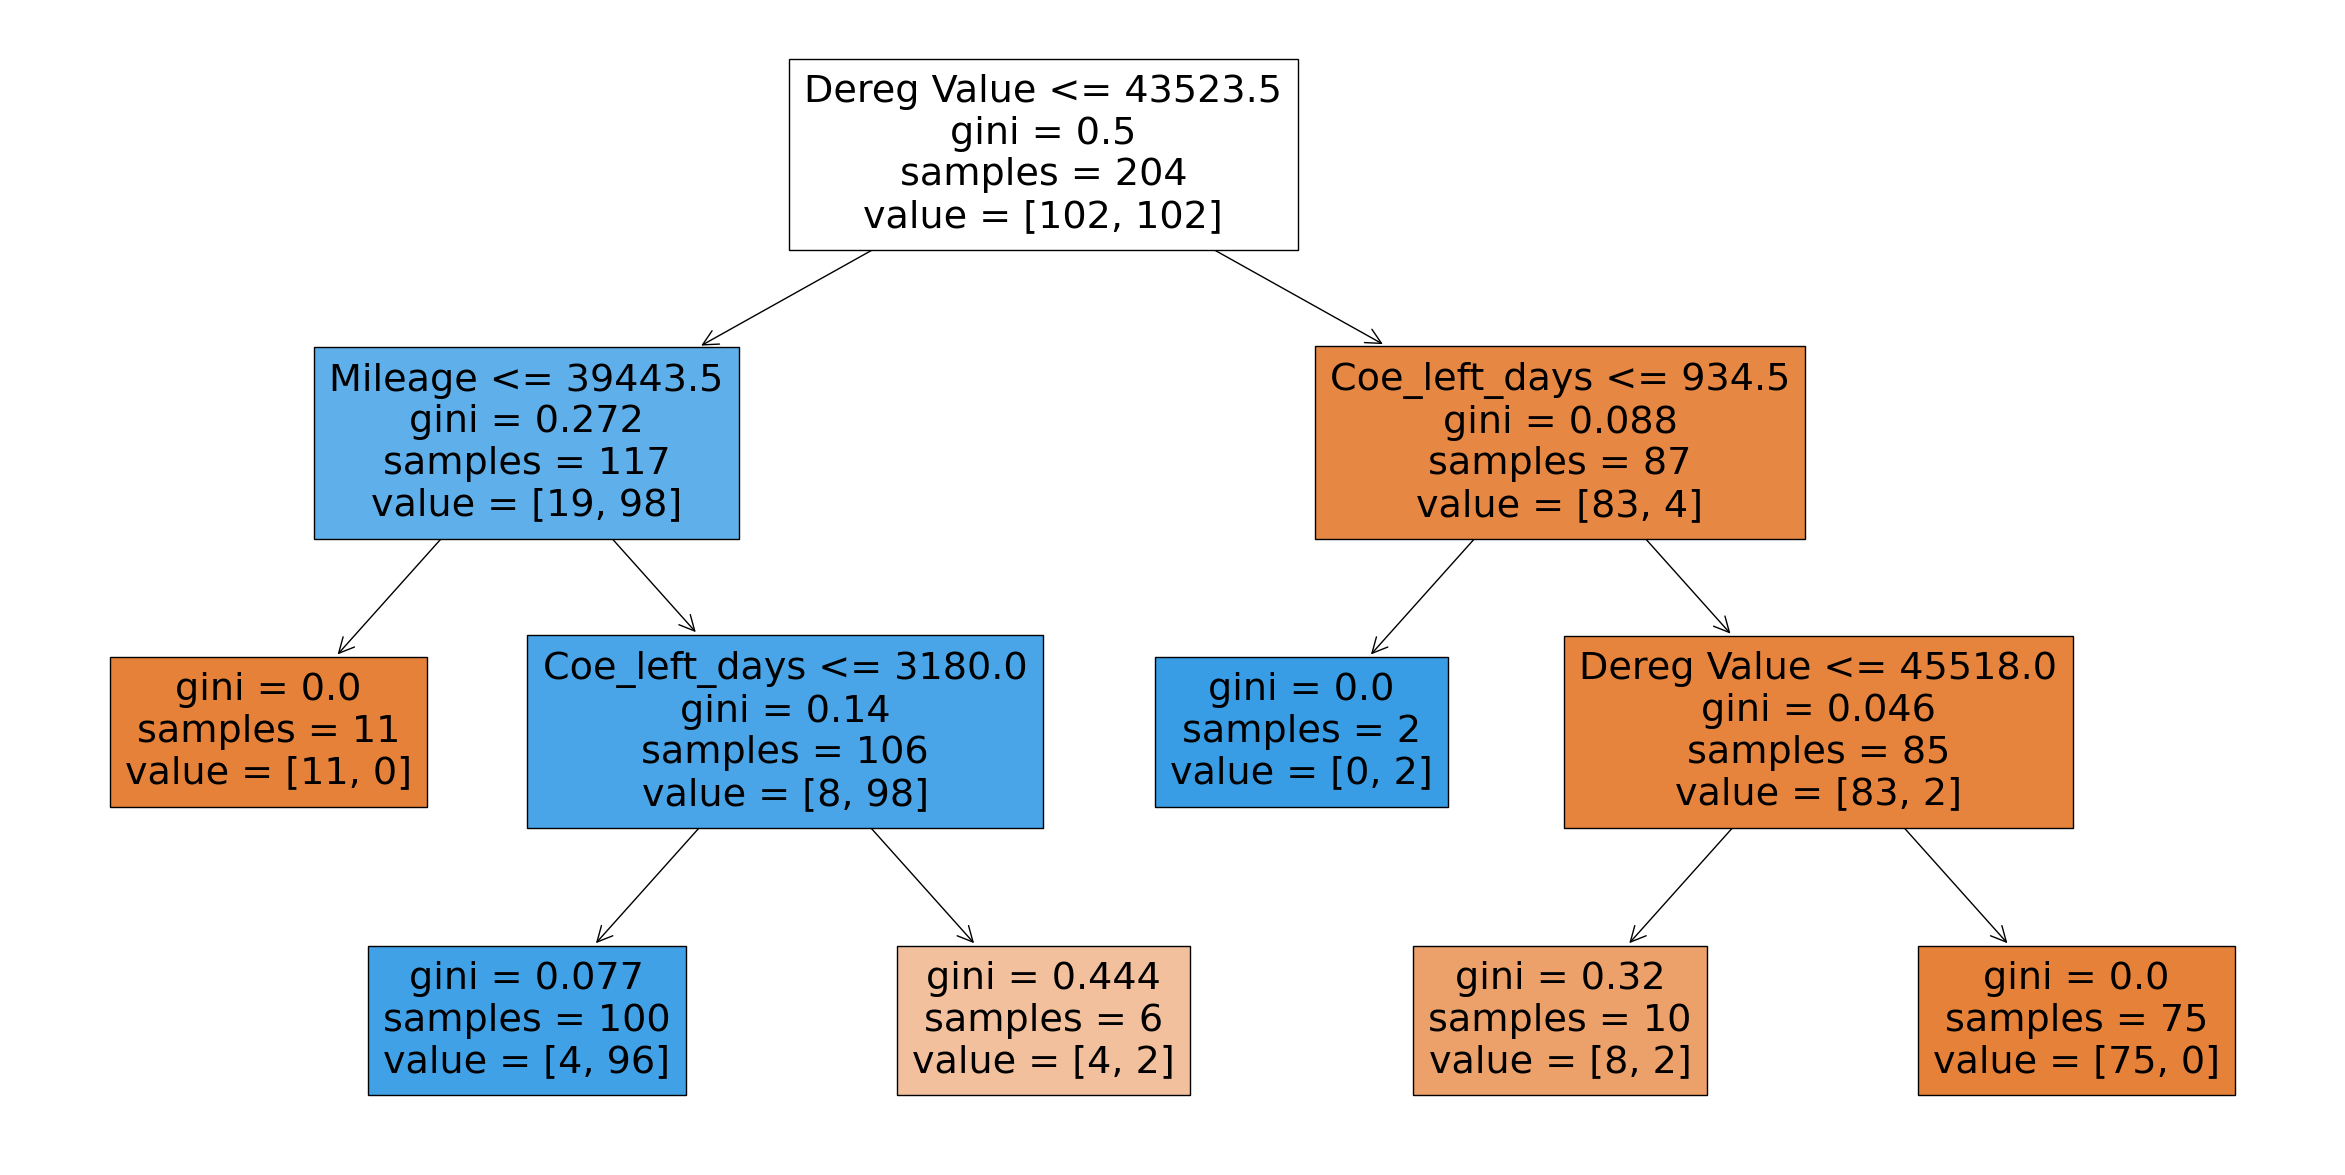

         Feature  Importance
3    Dereg Value    0.715006
1        Mileage    0.192606
9  Coe_left_days    0.092389
0            Dep    0.000000
2       Road Tax    0.000000
4     Engine Cap    0.000000
5    Curb Weight    0.000000
6   Manufactured    0.000000
7            OMV    0.000000
8          Power    0.000000


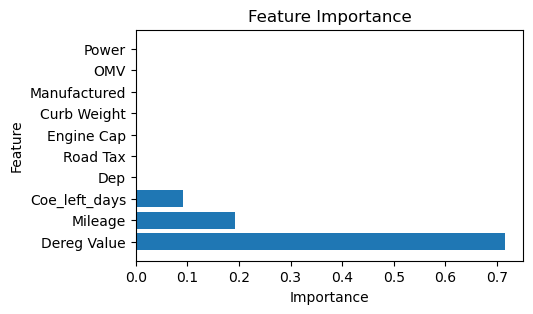

In [18]:
MPV_df = type_dataframes['MPV']

# Convert 'Price' column to numeric (assuming it contains numeric values but stored as strings)
MPV_df['Price'] = pd.to_numeric(MPV_df['Price'], errors='coerce')

# Drop rows with NaN in 'Price' column
MPV_df = MPV_df.dropna(subset=['Price'])

# Binning the 'Price' column into two groups
threshold = MPV_df['Price'].median()

MPV_df['Price_Group'] = pd.cut(MPV_df['Price'],
                                             bins=[MPV_df['Price'].min(), threshold, MPV_df['Price'].max()],
                                             labels=['Low', 'High'],
                                             include_lowest=True)

# Define features and target variable
X_MPV = MPV_df.drop(['Price', 'No. of Owners', 'Reg_date', 'Brand', 'Type','ARF', 'Price_Group','Transmission','COE'], axis=1)
y_MPV = MPV_df['Price_Group']  # Target variable ('Price_Group')

# Split the data into training and testing sets
X_train_MPV, X_test_MPV, y_train_MPV, y_test_MPV = train_test_split(X_MPV, y_MPV, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf_MPV = DecisionTreeClassifier(max_depth=3,random_state=42)

# Train the classifier using the training data
clf_MPV.fit(X_train_MPV, y_train_MPV)

# Predictions on the testing set
y_pred_MPV = clf_MPV.predict(X_test_MPV)

# Evaluate the model
accuracy_MPV = accuracy_score(y_test_MPV, y_pred_MPV)
print(f"Accuracy_MPV: {accuracy_MPV}")

# Fit the Decision Tree Classifier
clf_MPV.fit(X_train_MPV, y_train_MPV)

%matplotlib inline
plt.figure(figsize=(30,15))
plot_tree(clf_MPV, filled=True, feature_names=['Dep','Mileage','Road Tax','Dereg Value','Engine Cap','Curb Weight','Manufactured','OMV','Power','Coe_left_days'])
plt.show()

# Get feature importances
feature_importance_MPV = clf_MPV.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_MPV_df = pd.DataFrame({'Feature': ['Dep','Mileage','Road Tax','Dereg Value','Engine Cap','Curb Weight','Manufactured','OMV','Power','Coe_left_days'], 'Importance': feature_importance_MPV})
feature_importance_MPV_df = feature_importance_MPV_df.sort_values(by='Importance', ascending=False)

# Display or plot feature importances
print(feature_importance_MPV_df)
# Or visualize as a bar plot
plt.figure(figsize=(5, 3))
plt.barh(feature_importance_MPV_df['Feature'], feature_importance_MPV_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

Accuracy_Sw: 0.9166666666666666


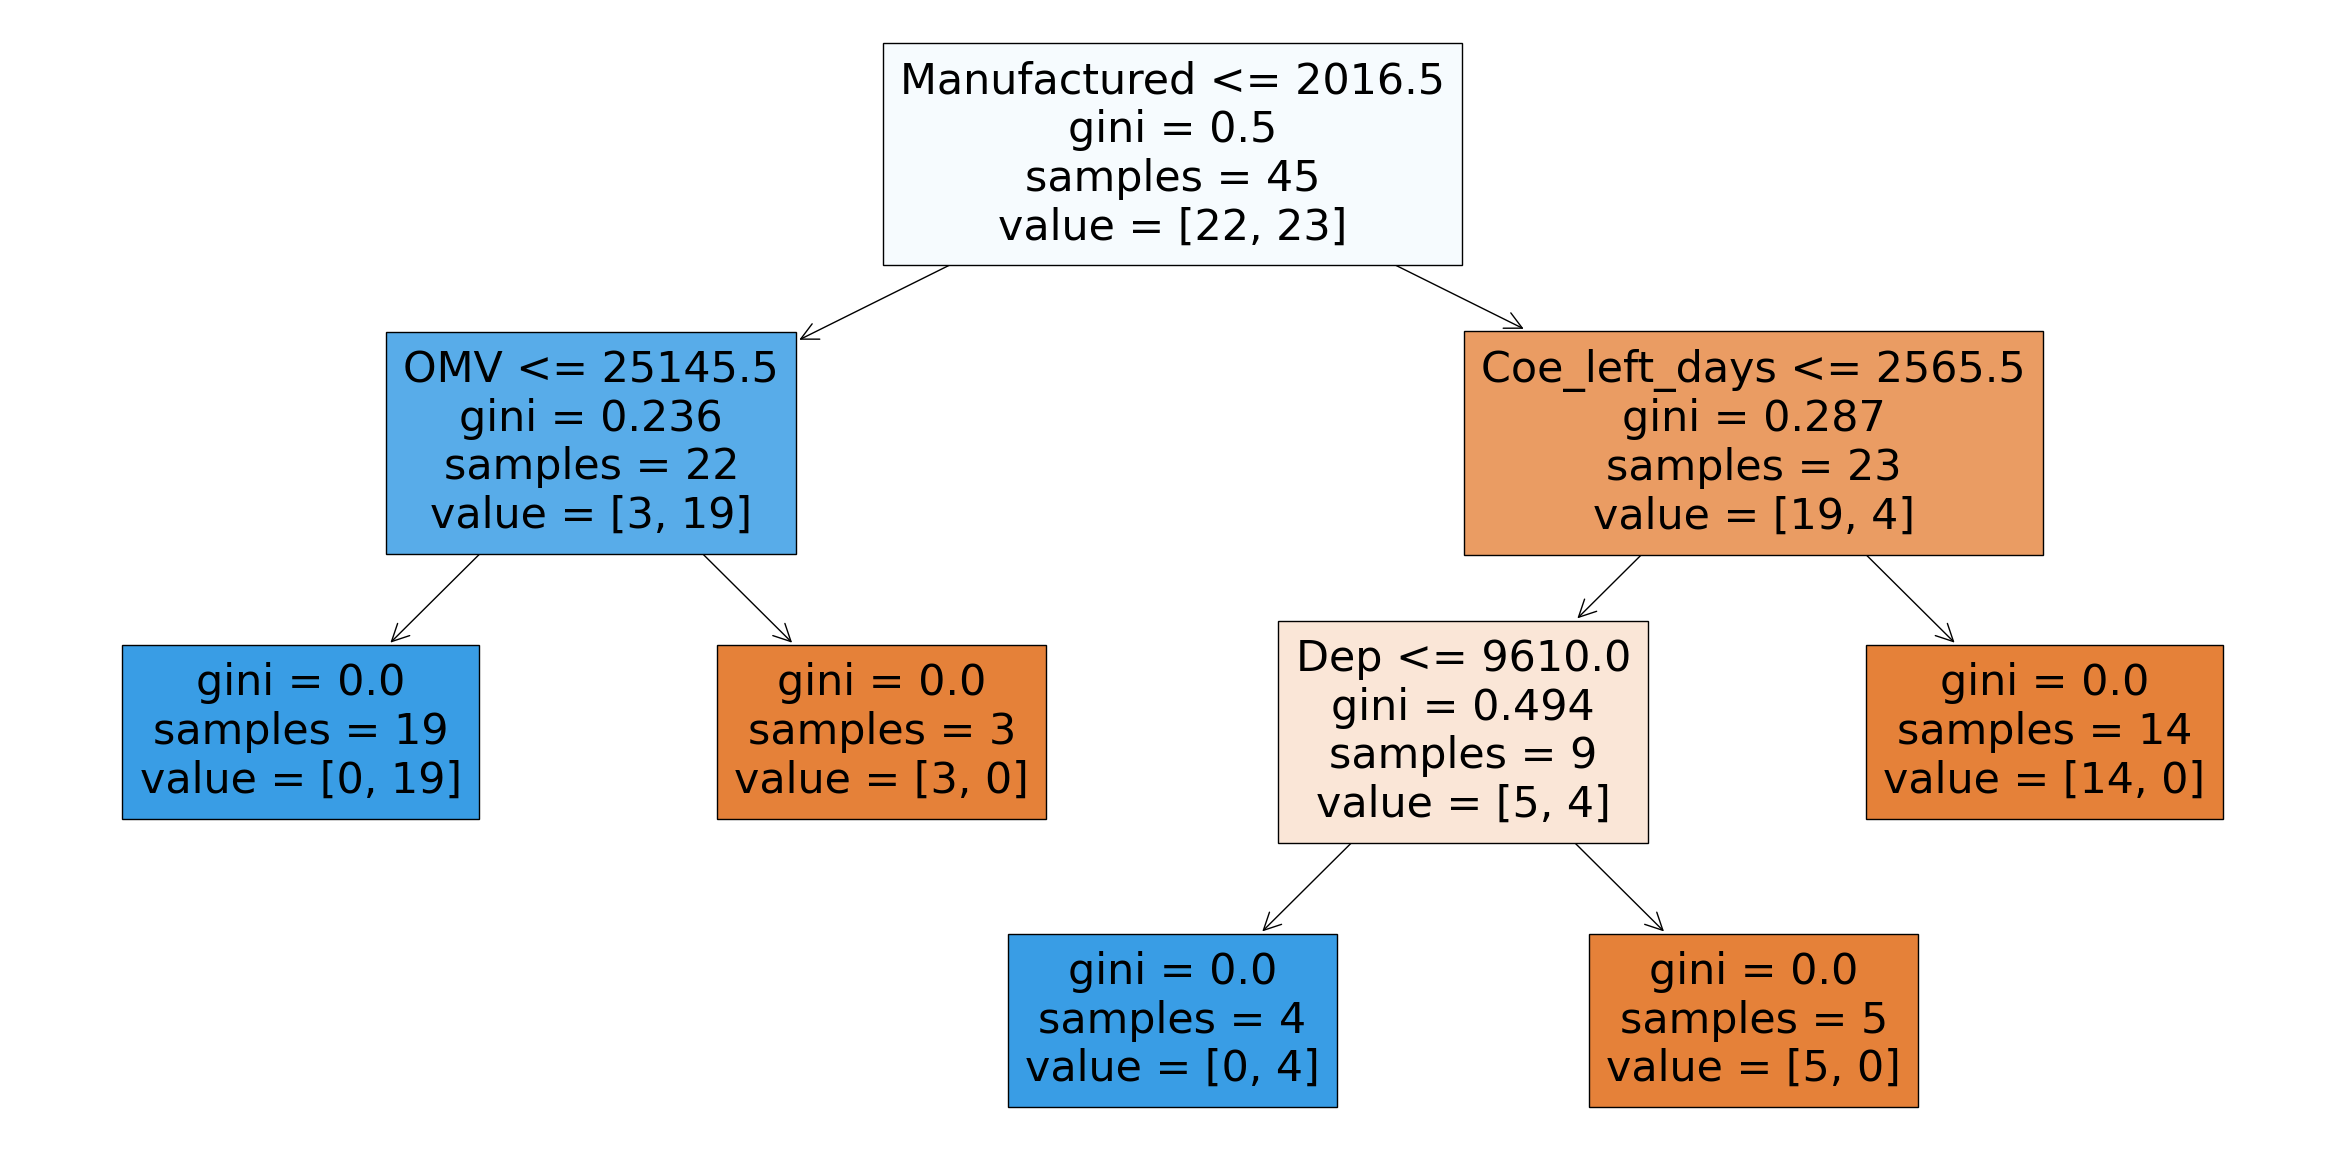

         Feature  Importance
6   Manufactured    0.475718
7            OMV    0.230417
0            Dep    0.197628
9  Coe_left_days    0.096236
1        Mileage    0.000000
2       Road Tax    0.000000
3    Dereg Value    0.000000
4     Engine Cap    0.000000
5    Curb Weight    0.000000
8          Power    0.000000


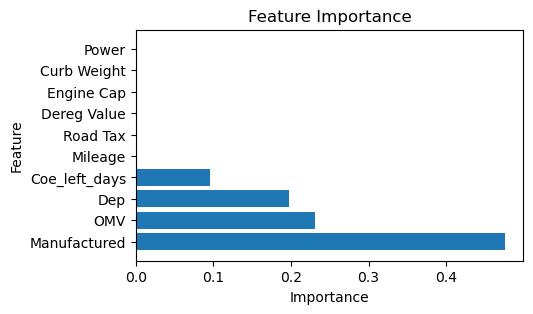

In [19]:
Sw_df = type_dataframes['Stationwagon']

# Convert 'Price' column to numeric (assuming it contains numeric values but stored as strings)
Sw_df['Price'] = pd.to_numeric(Sw_df['Price'], errors='coerce')

# Drop rows with NaN in 'Price' column
Sw_df = Sw_df.dropna(subset=['Price'])

# Binning the 'Price' column into two groups
threshold = Sw_df['Price'].median()

Sw_df['Price_Group'] = pd.cut(Sw_df['Price'],
                                             bins=[Sw_df['Price'].min(), threshold, Sw_df['Price'].max()],
                                             labels=['Low', 'High'],
                                             include_lowest=True)

# Define features and target variable
X_Sw = Sw_df.drop(['Price', 'No. of Owners', 'Reg_date', 'Brand', 'Type', 'ARF', 'Price_Group','Transmission','COE'], axis=1)
y_Sw = Sw_df['Price_Group']  # Target variable ('Price_Group')

# Split the data into training and testing sets
X_train_Sw, X_test_Sw, y_train_Sw, y_test_Sw = train_test_split(X_Sw, y_Sw, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf_Sw = DecisionTreeClassifier(max_depth=3,random_state=42)

# Train the classifier using the training data
clf_Sw.fit(X_train_Sw, y_train_Sw)

# Predictions on the testing set
y_pred_Sw = clf_Sw.predict(X_test_Sw)

# Evaluate the model
accuracy_Sw = accuracy_score(y_test_Sw, y_pred_Sw)
print(f"Accuracy_Sw: {accuracy_Sw}")

# Fit the Decision Tree Classifier
clf_Sw.fit(X_train_Sw, y_train_Sw)

%matplotlib inline
plt.figure(figsize=(30,15))
plot_tree(clf_Sw, filled=True, feature_names=['Dep','Mileage','Road Tax','Dereg Value','Engine Cap','Curb Weight','Manufactured','OMV','Power','Coe_left_days'])
plt.show()

# Get feature importances
feature_importance_Sw = clf_Sw.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_Sw_df = pd.DataFrame({'Feature': ['Dep','Mileage','Road Tax','Dereg Value','Engine Cap','Curb Weight','Manufactured','OMV','Power','Coe_left_days'], 'Importance': feature_importance_Sw})
feature_importance_Sw_df = feature_importance_Sw_df.sort_values(by='Importance', ascending=False)

# Display or plot feature importances
print(feature_importance_Sw_df)
# Or visualize as a bar plot
plt.figure(figsize=(5, 3))
plt.barh(feature_importance_Sw_df['Feature'], feature_importance_Sw_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()